<a href="https://colab.research.google.com/github/AbdulrahmanAhmed123/social_media/blob/main/Sales_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('sales_data.csv')
df
df.columns
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers (data points outside the bounds)
outliers = df[(df['price'] > upper_bound) | (df['price'] < lower_bound)]

print("Outliers:", outliers)
df = df.drop(outliers.index)
print("Outliers:", outliers)


Outliers:          date product     category   price  quantity  revenue
1  2022-01-01  Laptop  Electronics  1200.0       5.0   6000.0
Outliers:          date product     category   price  quantity  revenue
1  2022-01-01  Laptop  Electronics  1200.0       5.0   6000.0


In [ ]:
print(df.head())  # View the first few rows
print(df.tail())  # View the last few rows
print(df.shape)  # Get dimensions (rows, columns)
print(df.dtypes)  # Check data types of columns

# Summary statistics for numerical columns
print(df.describe())


         date     product     category  price  quantity  revenue
0  2022-01-01  Smartphone  Electronics  600.0      10.0   6000.0
2  2022-01-02     T-Shirt     Clothing   20.0      50.0   1000.0
3  2022-01-03  Headphones  Electronics  100.0      20.0   2000.0
4  2022-01-04     T-Shirt     Clothing   20.0      25.0    500.0
5  2022-01-05       Watch  Accessories  150.0      10.0   1500.0
           date     product     category  price  quantity  revenue
364  2022-12-27       Watch  Accessories  150.0       5.0    750.0
365  2022-12-28        Coat     Clothing  100.0       5.0    500.0
366  2022-12-29  Headphones  Electronics  100.0      10.0   1000.0
367  2022-12-30  Smartphone  Electronics  600.0      11.0   6600.0
368  2022-12-31      Hoodie     Clothing   40.0      30.0   1200.0
(368, 6)
date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object
            price    quantity      revenue
count  366.000000  367

In [ ]:
print(df.isnull().sum())

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64


In [ ]:
df['price'].fillna(method='ffill', inplace=True)
df['quantity'].fillna(method='ffill', inplace=True)
df['revenue'].fillna(method='ffill', inplace=True)

In [ ]:
total_revenue = df['revenue'].sum()
print("Total Revenue:", total_revenue)



Total Revenue: 753830.0


In [ ]:
average_revenue = df['revenue'].mean()
print("Average Revenue per Transaction:", average_revenue)


Average Revenue per Transaction: 2048.4510869565215


In [ ]:
top_selling_products = df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products (Revenue):", top_selling_products)

Top 10 Selling Products (Revenue): product
Smartphone    434400.0
Smartwatch     60300.0
Speaker        39680.0
Coat           33800.0
Watch          32700.0
Sneakers       21600.0
Hoodie         21000.0
Jeans          20650.0
Backpack       20400.0
T-Shirt        20100.0
Name: revenue, dtype: float64


In [ ]:
# df['date'] = pd.to_datetime(df['date'])
# monthly_revenue = df.resample('M', on='date')['revenue'].sum()
# monthly_revenue.plot(kind='line')
# plt.ylabel("Monthly Revenue")
# plt.show()


In [ ]:
revenue_by_category = df.groupby('category')['revenue'].sum()
print("Revenue by Category:", revenue_by_category)

unique_categories=np.unique(df['category'])
# len(unique_categories)
# df['category'].value_counts()

Revenue by Category: category
Accessories    106200.0
Bags            19500.0
Bgas              900.0
Clohting         1200.0
Clothing        94350.0
Electronics    510080.0
Shoes           20640.0
Shoeses           960.0
Name: revenue, dtype: float64


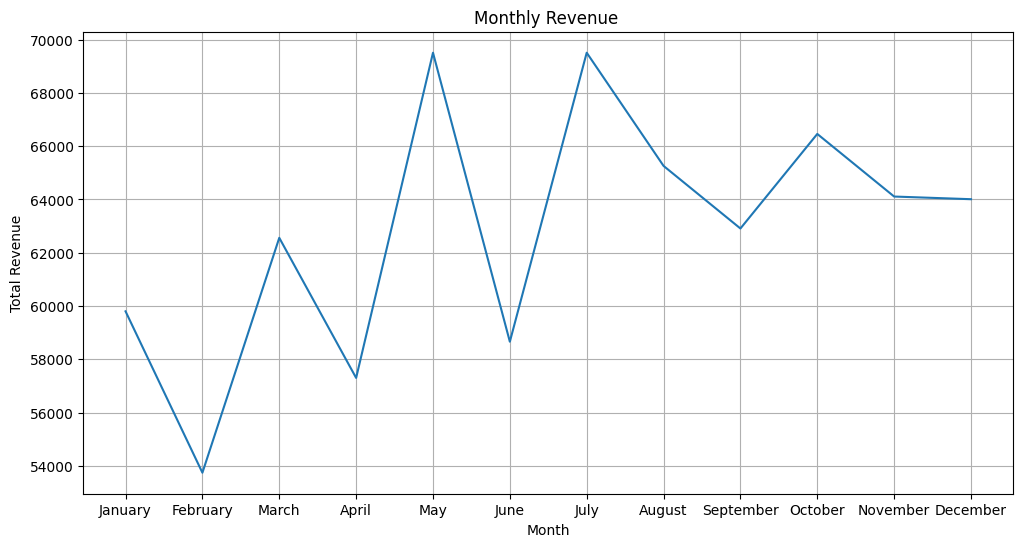

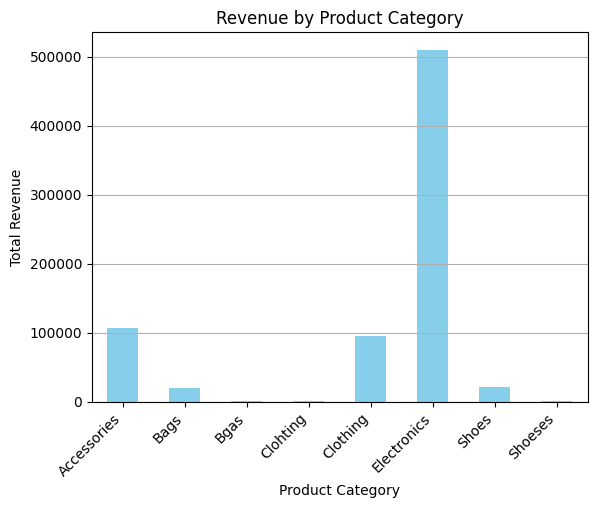

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df_resampled = df.resample('M', on='date')['revenue'].sum()  # Resample by month

plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index.month_name(), df_resampled.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue ')
plt.grid(True)
plt.show()
category_totals = df.groupby('category')['revenue'].sum()
category_totals.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.grid(axis='y')

plt.show()

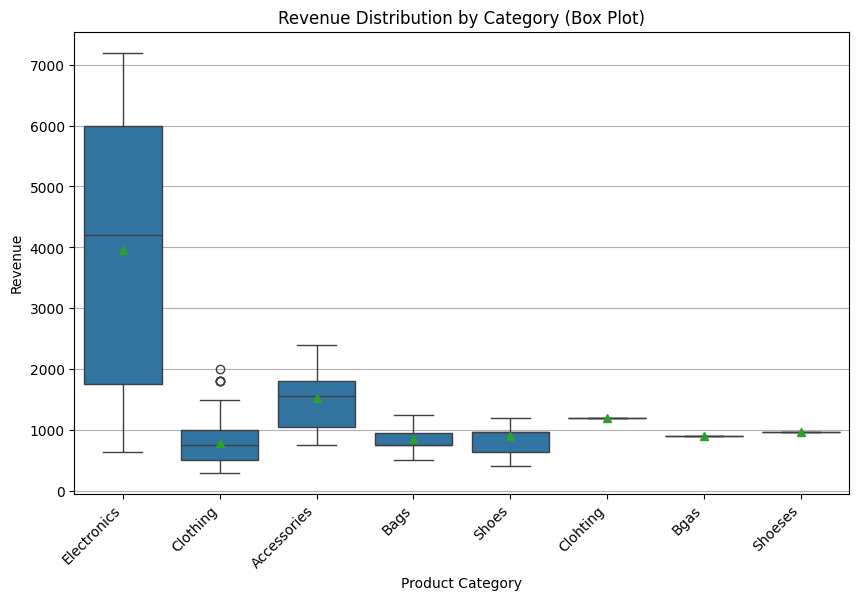

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="category",
    y="revenue",
    showmeans=True,  # Display mean values within boxes
    data=df
)
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Category (Box Plot)')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.grid(axis='y')
plt.show()

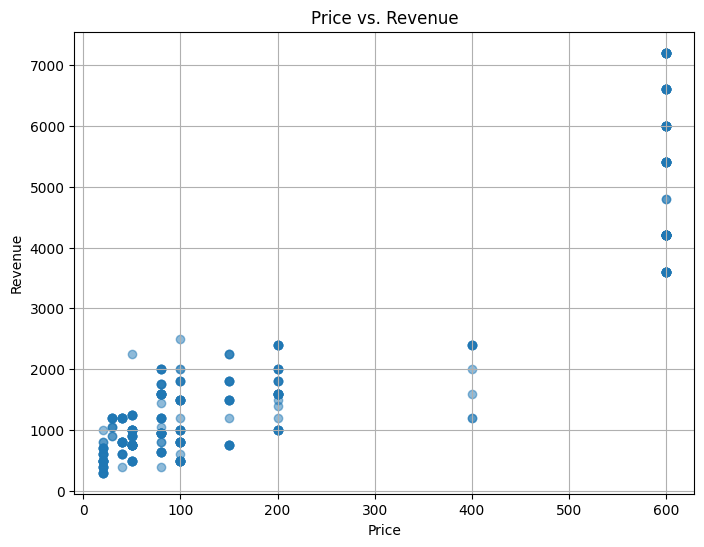

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['revenue'], alpha=0.5)  # Adjust alpha for transparency
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Price vs. Revenue')
plt.grid(True)
plt.show()

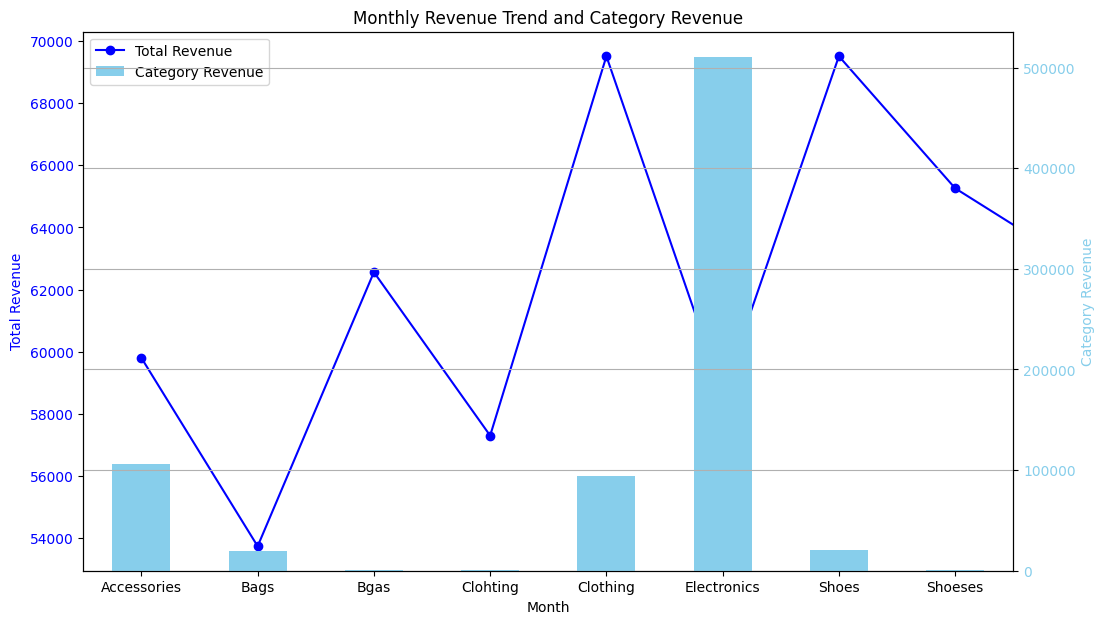

In [ ]:

# Assuming 'df' is your DataFrame, 'date' is datetime, and categories are unique
df['date'] = pd.to_datetime(df['date'])
df_resampled = df.resample('M', on='date')['revenue'].sum()  # Resample by month
category_totals = df.groupby('category')['revenue'].sum()  # Total revenue per category

fig, ax1 = plt.subplots(figsize=(12, 7))

# Line graph on primary axis (left)
ax1.plot(df_resampled.index.month_name(), df_resampled.values, marker='o', color='b', label='Total Revenue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Secondary axis for bar chart (right)
ax2 = ax1.twinx()  # Share x-axis with primary axis
category_totals.plot(kind='bar', ax=ax2, color='skyblue', label='Category Revenue')
ax2.set_ylabel('Category Revenue', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Configure labels and title
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title('Monthly Revenue Trend and Category Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate month labels for readability
plt.grid(True)
plt.show()

In [ ]:
df_grouped = df.groupby('category')['revenue'].sum()

round((df_grouped/df['revenue'].sum())*100,1)

product_other_list={'other product':df_grouped[round((df_grouped/df['revenue'].sum())*100,1)<1].sum()}
product_other_list
df_grouped[round((df_grouped/df['revenue'].sum())*100,1)>1]
other_df = pd.DataFrame.from_dict(product_other_list, orient='index', columns=['revenue'])


# Assuming df_grouped is a Series and product_other_list is a dictionary
other_series = pd.Series(product_other_list['other product'])  # Create a Series from the dictionary
combined_series = pd.concat([df_grouped, other_series])  # Concatenate Series

# Calculate total revenue
total_revenue = df['revenue'].sum()

# Filter df_grouped based on percentage contribution
filtered_df_grouped = df_grouped[round((df_grouped / total_revenue) * 100, 1) > 1]



# Reset index if needed (optional)
filtered_df_grouped = filtered_df_grouped.reset_index()



In [ ]:


# Assuming 'revenue' is the column containing revenue values
total_revenue = df['revenue'].sum()
print(f"Total Revenue: {total_revenue:.2f}")
import pandas as pd

# Assuming 'category' is the column representing product categories
highest_revenue_product = df['revenue'].idxmax()  # Index of the maximum value
highest_revenue_value = df['revenue'].max()  # Maximum revenue value

print(f"Product with Highest Revenue: {highest_revenue_product}")
print(f"Revenue Generated: {highest_revenue_value:.2f}")  # Format as currency (optional)
df.index[13]
df_maxproduct=df[df['revenue']==df['revenue'].max()]
df_maxproduct['product']
average_price_by_product = df.groupby('product')['price'].mean()
print(f"Average Price by Product:\n{average_price_by_product}")
total_quantity_sold = df['quantity'].sum()

print(f"Total Quantity Sold: {total_quantity_sold}")

df_grouped = df.groupby('category')['revenue'].sum()

# Find category with highest revenue (index of maximum value)
highest_revenue_category = df_grouped.idxmax()

# Get the highest revenue value
highest_revenue = df_grouped.max()

print(f"Category with Highest Revenue: {highest_revenue_category}")
print(f"Revenue Generated: {highest_revenue:.2f}")  #

avgPerSale=df['revenue'].mean()
print(f"Average per sale: {avgPerSale:.2f}")

Total Revenue: 753830.00
Product with Highest Revenue: 13
Revenue Generated: 7200.00
Average Price by Product:
product
Backpack       50.000000
Coat          100.000000
Headphones    100.000000
Hoodie         40.000000
Jeans          50.000000
Smartphone    600.000000
Smartwatch    200.000000
Sneakers       80.000000
Speaker        80.000000
T-Shirt        20.000000
Tablet        400.000000
Wallet         34.166667
Watch         145.454545
Name: price, dtype: float64
Total Quantity Sold: 5370.0
Category with Highest Revenue: Electronics
Revenue Generated: 510080.00
Average per sale: 2048.45


Total Revenue by Quarter:
quarter
1    176100.0
2    185470.0
3    197680.0
4    194580.0
Name: revenue, dtype: float64


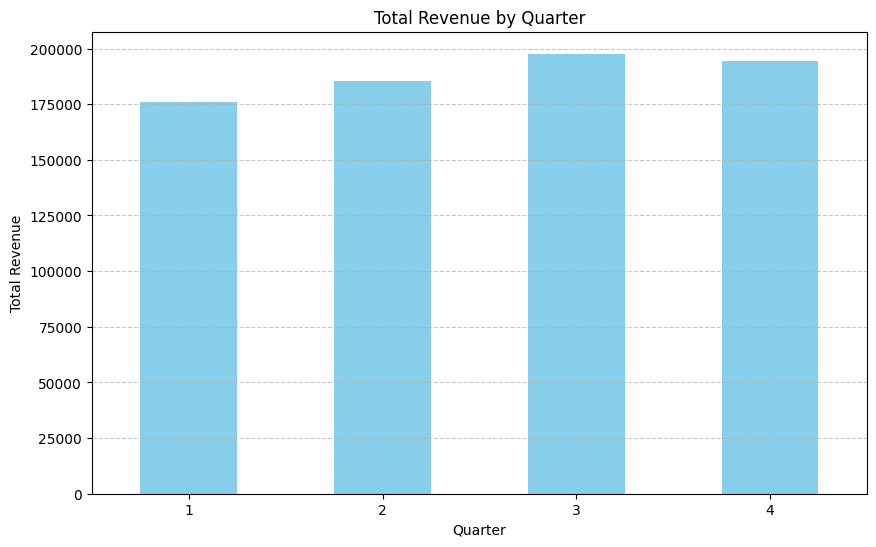

In [ ]:
df['quarter'] = pd.to_datetime(df['date']).dt.quarter

# Group by quarter and sum revenue
total_revenue_by_quarter = df.groupby('quarter')['revenue'].sum()

print(f"Total Revenue by Quarter:\n{total_revenue_by_quarter}")
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
total_revenue_by_quarter.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title("Total Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines on y-axis

# Display the chart
plt.show()
